In [1]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [2]:
import sklearn.model_selection
dir(sklearn.model_selection)[:5]

['BaseCrossValidator',
 'BaseShuffleSplit',
 'GridSearchCV',
 'GroupKFold',
 'GroupShuffleSplit']

In [3]:
import sklearn
sklearn.__all__[-15:-10]

['neural_network',
 'pipeline',
 'preprocessing',
 'random_projection',
 'semi_supervised']

## 01 데이터 전처리
### **MinMaxScaler**

In [4]:
import pandas as pd
train = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/airline/x_test.csv')
display(train.head(2))

,ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,id
0,0,Female,Loyal Customer,54,Personal Travel,Eco,1068,3,4,3,...,5,5,3,5,3,5,3,47,22.0,NaN
1,2,Male,Loyal Customer,20,Personal Travel,Eco,1546,4,4,4,...,4,3,3,4,4,4,4,5,2.0,NaN


In [5]:
from sklearn.preprocessing import MinMaxScaler

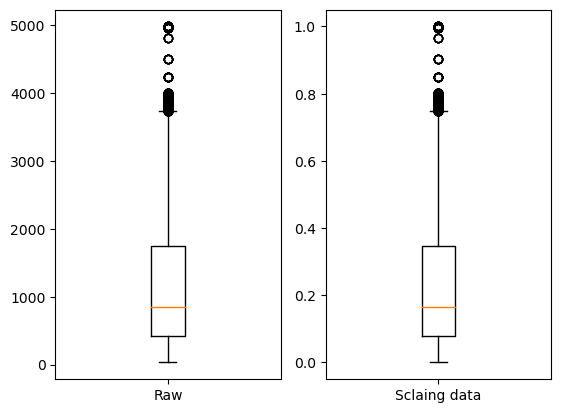

In [6]:
mm = MinMaxScaler()
mm.fit(train['Flight Distance'].values.reshape(-1,1))

scalingdata = mm.transform(train['Flight Distance'].values.reshape(-1,1))
train['scaling'] = scalingdata

##결과 시각화
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)

ax[0].boxplot(train['Flight Distance'])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['Raw'])
ax[1].boxplot(scalingdata)
ax[1].set_xticks([1])
ax[1].set_xticklabels(['Sclaing data'])
plt.show()

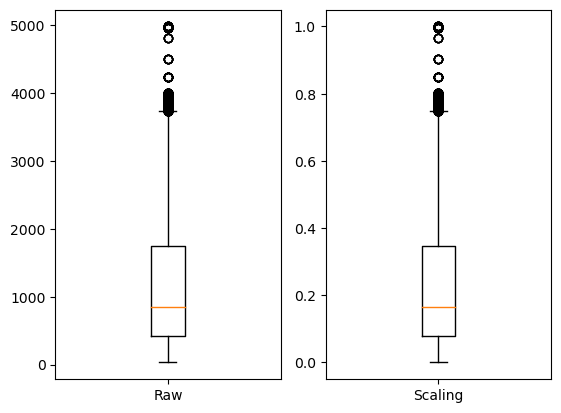

In [7]:
scaling = (train['Flight Distance'] - train['Flight Distance'].min())/(train['Flight Distance'].max() - train['Flight Distance'].min())
train['scaling'] = scaling

##결과 시각화
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2)
ax[0].boxplot(train['Flight Distance'])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['Raw'])
ax[1].boxplot(scaling)
ax[1].set_xticks([1])
ax[1].set_xticklabels(['Scaling'])
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(train['Age'].values.reshape(-1,1))

train['age_scaling'] = mm.transform(train['Age'].values.reshape(-1,1))
test['age_scaling'] = mm.transform(test['Age'].values.reshape(-1,1))

display(test[['ID','age_scaling']].head(3))

,ID,age_scaling
0,1,0.269231
1,16,0.346154
2,17,0.205128


### StandardScaler ###

In [ ]:
pip install 

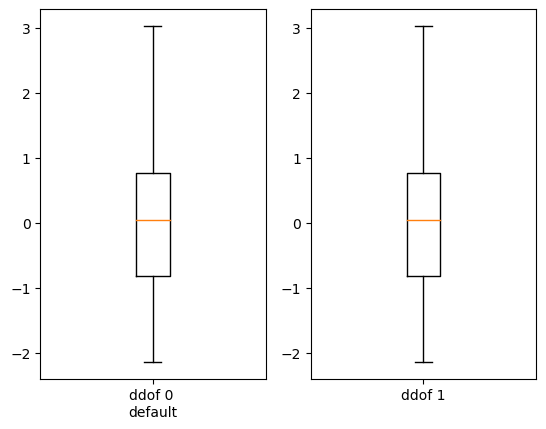

,scaling
count,83123.000000
mean,0.000000
std,1.000000
min,-2.142709
25%,-0.818424
50%,0.042361
75%,0.770717
max,3.022001
,scaling_ddof0
count,83123.000000


In [15]:
scaling_ddof1 = (train['Age'] - train['Age'].mean())/(train['Age'].std())
train['scaling'] = scaling_ddof1

scaling_ddof0 = (train['Age'] -train['Age'].mean()) / (train['Age'].std(ddof=0))
train['scaling_ddof0'] = scaling_ddof0

##결과 시각화
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2)
ax[0].boxplot(train['scaling'])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['ddof 0 \ndefault'])
ax[1].boxplot(train['scaling_ddof0'])
ax[1].set_xticks([1])
ax[1].set_xticklabels(['ddof 1'])
plt.show()

from IPython.display import display_html

df1 = train[['scaling']].describe()
df2 = train[['scaling_ddof0']].describe()

df1_styler = df1.style.set_table_attributes("style ='display:inline'").set_caption('Caption table 1')
df2_styler = df2.style.set_table_attributes("style ='display:inline'").set_caption('Caption table 2')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw =True)

,ID,age_scaling
0,1,-0.752215
1,16,-0.354927
2,17,-1.083288


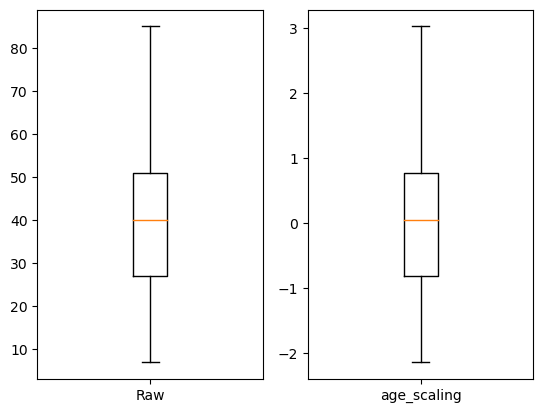

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(train['Age'].values.reshape(-1,1))

train['age_scaling'] = sc.transform(train['Age'].values.reshape(-1,1))
test['age_scaling'] = sc.transform(test['Age'].values.reshape(-1,1))

display(test[['ID','age_scaling']].head(3))

#결과 시각화
import matplotlib.pyplot as plt
fig , ax = plt.subplots(1,2)
ax[0].boxplot(train['Age'])
ax[0].set_xticks([1])
ax[0].set_xticklabels(['Raw'])
ax[1].boxplot(train['age_scaling'])
ax[1].set_xticks([1])
ax[1].set_xticklabels(['age_scaling'])
plt.show()

### LableEncoder ###